<a href="https://colab.research.google.com/github/lynxoo/dmi_ue_wro/blob/master/Zadanie_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Termin realizacji zadania: 02.07.2020

Forma zadania: załącznik wysłany na anna.kula@ue.wroc.pl

Zadanie do wykonania:

Wzrorujac się na przykładzie dla zbioru irysów, proszę wykonać grupowanie dla zbioru:(https://raw.githubusercontent.com/aniku10/dataMining/master/seeds_dataset.csv) Seeds. 

Proszę zwrócić uwagę na separator, nagłówki kolumn itp.

Opis zbioru:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
8. Class: 1 - Kama, 2 - Rosa, 3 - Canadian





In [4]:
import pandas as pd
import numpy as np

# Pobranie danych

In [5]:
seeds = pd.read_csv("https://raw.githubusercontent.com/aniku10/dataMining/master/seeds_dataset.csv", sep=';', header=None)
seeds.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## Zmiana nazw kolumn i dyskretyzacja klas

In [6]:
seeds.rename(
    columns={
        0: 'area',
        1: 'perimeter',
        2: 'compactness',
        3: 'kernel_length',
        4: 'kernel_width',
        5: 'asymmetry_coefficient',
        6: 'kernel_groove_length',
        7: 'class' 
    }, 
    inplace=True
)

seeds['class'][seeds['class'] == 1] = 'Kama'
seeds['class'][seeds['class'] == 2] = 'Rosa'
seeds['class'][seeds['class'] == 3] = 'Canadian'

seeds.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama


In [7]:
seeds['class'].value_counts()

Rosa        70
Kama        70
Canadian    69
Name: class, dtype: int64

## Weryfikacja danych zawartych w zbiorze

In [8]:
seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   209 non-null    float64
 1   perimeter              209 non-null    float64
 2   compactness            209 non-null    float64
 3   kernel_length          209 non-null    float64
 4   kernel_width           209 non-null    float64
 5   asymmetry_coefficient  209 non-null    float64
 6   kernel_groove_length   209 non-null    float64
 7   class                  209 non-null    object 
dtypes: float64(7), object(1)
memory usage: 13.2+ KB


In [9]:
seeds.describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,14.859713,14.565120,0.871248,5.630378,3.259967,3.690934,5.409722
std,2.911306,1.306348,0.023408,0.443318,0.378104,1.501144,0.492076
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.260000,13.450000,0.857500,5.263000,2.941000,2.553000,5.045000
50%,14.370000,14.350000,0.873500,5.527000,3.242000,3.598000,5.224000
75%,17.320000,15.730000,0.887900,5.980000,3.562000,4.756000,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


# Clustering

## Przygotowanie danych

In [10]:
classes = seeds['class']
samples = seeds.drop(['class'], axis=1)

In [11]:
classes.head(5)

0    Kama
1    Kama
2    Kama
3    Kama
4    Kama
Name: class, dtype: object

In [12]:
samples.head(5)

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


## Wyświetlenie wartości inercji i określenie liczby klastrów

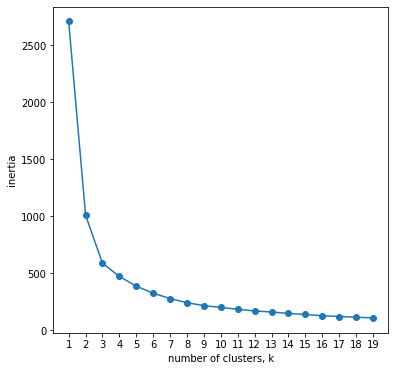

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

ks = range(1, 20)

inertia_scores = []


for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(samples)
    inertia_scores.append(model.inertia_)

plt.rcParams["figure.figsize"] = (6,6)
plt.plot(ks, inertia_scores, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Wartość inercji przestaje gwałtowanie spadać przy podziale na 3 klastry, co pokrywa się z liczbą klas występujących w zbiorze.

## Clustering na bazie Klasyfikatora KMeans

### Uczenie modelu przy pomocy nieprzetworzonych danych

In [14]:
model = KMeans(n_clusters=3)
labels = model.fit_predict(samples)
df = pd.DataFrame({'labels': labels, 'classes': classes})
ct = pd.crosstab(df['labels'], df['classes'])
ct

classes,Canadian,Kama,Rosa
labels,,,
0,2,60,10
1,0,1,60
2,67,9,0


### Uczenie modelu przy pomocy danych po skalowaniu

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
kmeans = KMeans(n_clusters = 3)
pipeline = make_pipeline(scaler,kmeans)
pipeline.fit(samples)
labels = pipeline.predict(samples)
df = pd.DataFrame({'labels': labels, 'classes': classes})
ct = pd.crosstab(df['labels'], df['classes'])

ct

classes,Canadian,Kama,Rosa
labels,,,
0,64,6,0
1,5,62,5
2,0,2,65


### Uczenie modelu przy pomocy danych po normalizacji

In [35]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
kmeans = KMeans(n_clusters = 3)
pipeline = make_pipeline(normalizer, kmeans)
pipeline.fit(samples)
labels = pipeline.predict(samples)
df = pd.DataFrame({'labels': labels, 'classes': classes})
ct = pd.crosstab(df['labels'], df['classes'])

ct

classes,Canadian,Kama,Rosa
labels,,,
0,5,22,38
1,4,45,32
2,60,3,0


## Clustering przy pomocy algorytmu aglomeracyjnego

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [33]:
def compute_dendrogram(method):
  plt.rcParams["figure.figsize"] = (30,10)
  mergings = linkage(samples, method=method)
  a_classes = np.array(classes)
  dendrogram(mergings,
            labels = a_classes,
            leaf_rotation=90,
            leaf_font_size=6,
  )
  plt.title(f"Metoda {method}")
  plt.show()

### Dendrogram dla metody najdalszych sąsiadów

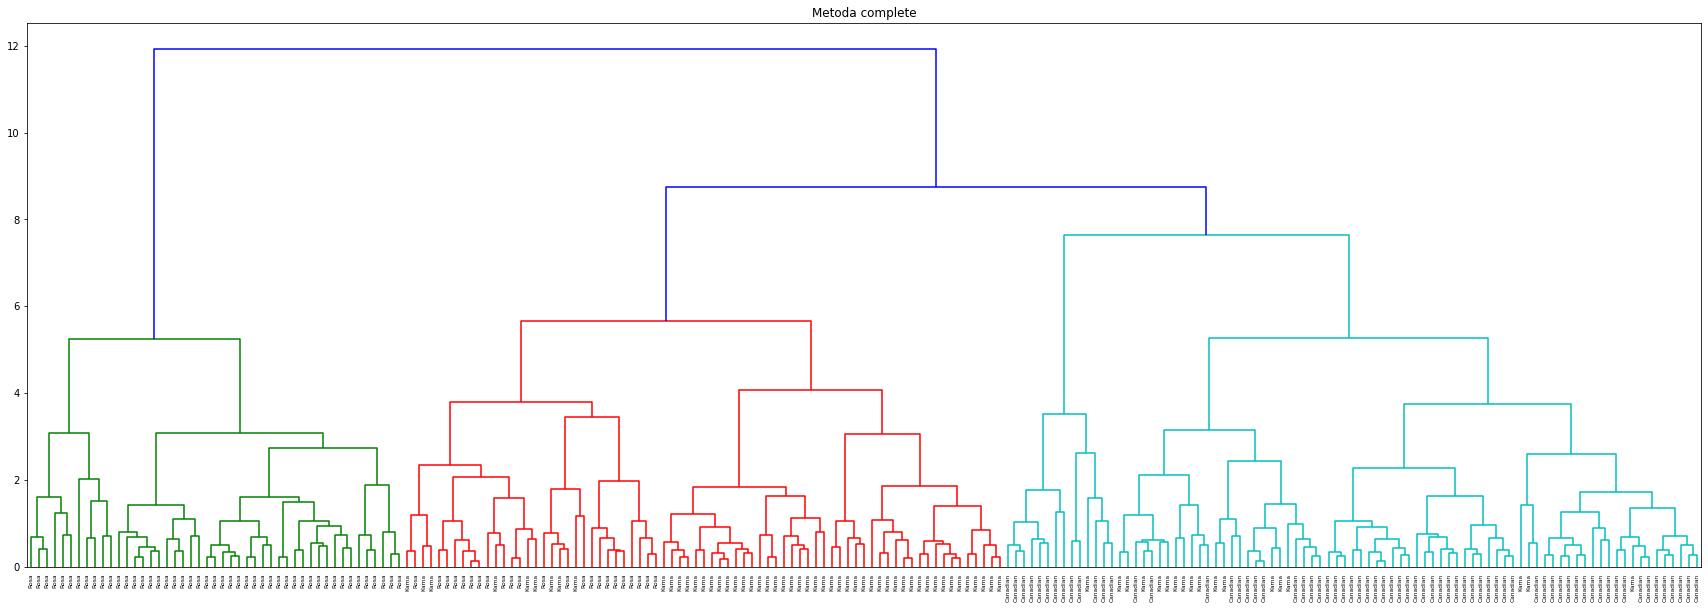

In [32]:
compute_dendrogram('complete')

### Dendrogram dla metody najbliższych sąsiadów

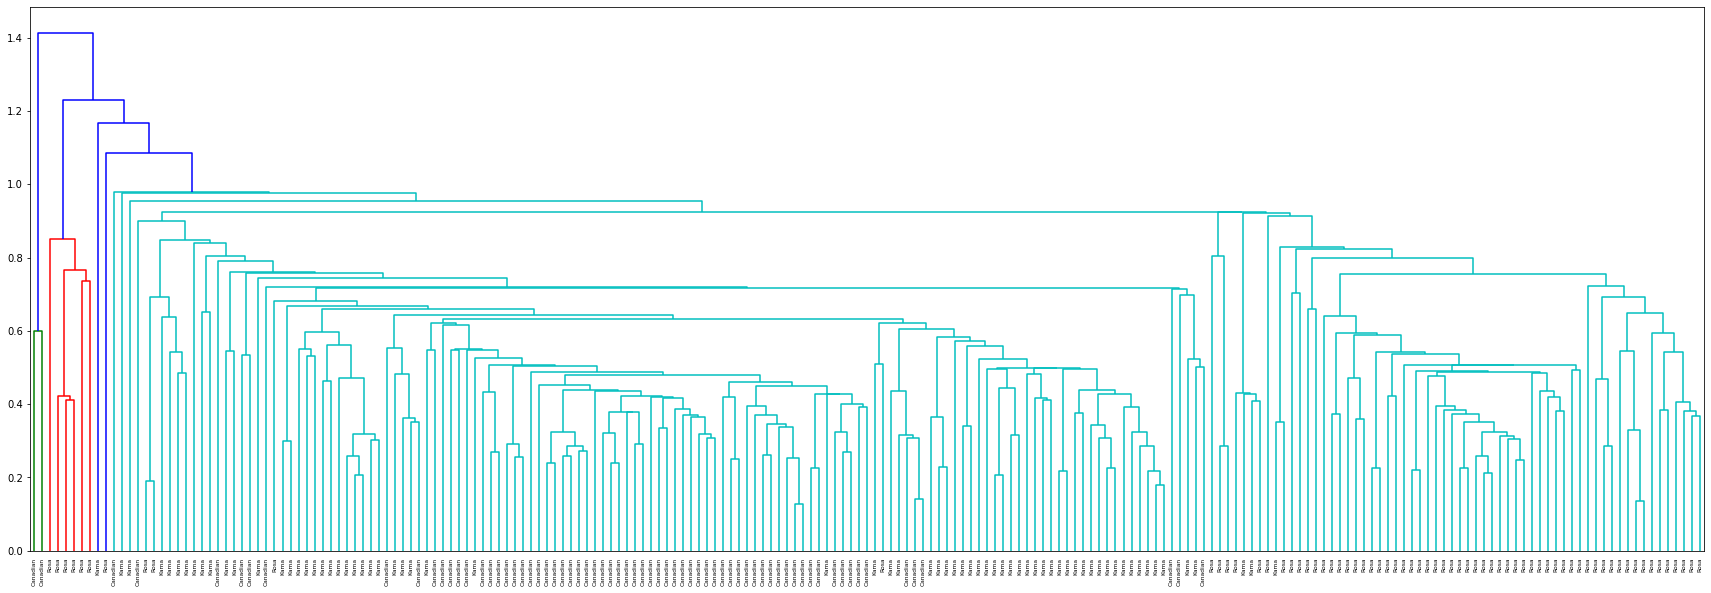

In [28]:
compute_dendrogram('single')

### Dendrogram dla metody średnich

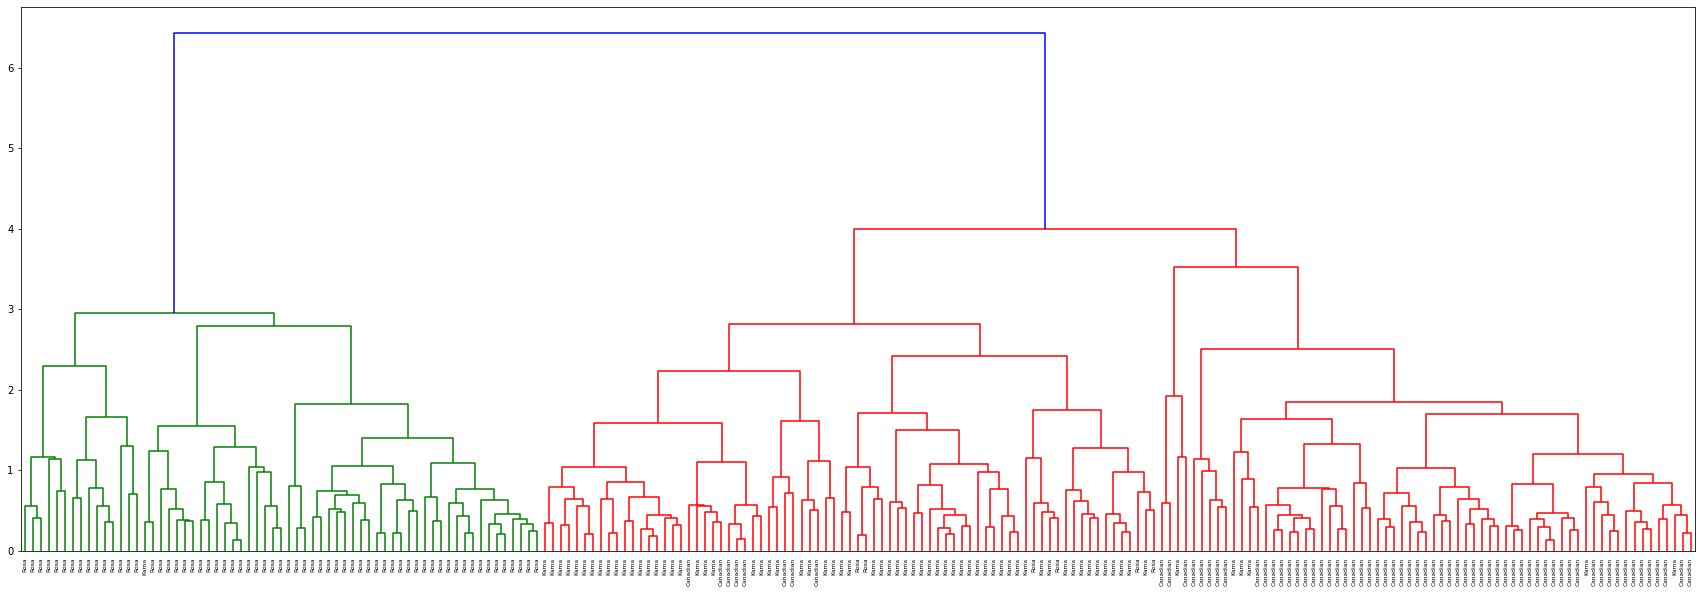

In [29]:
compute_dendrogram('average')

### Dendrogram dla metody Ward'a

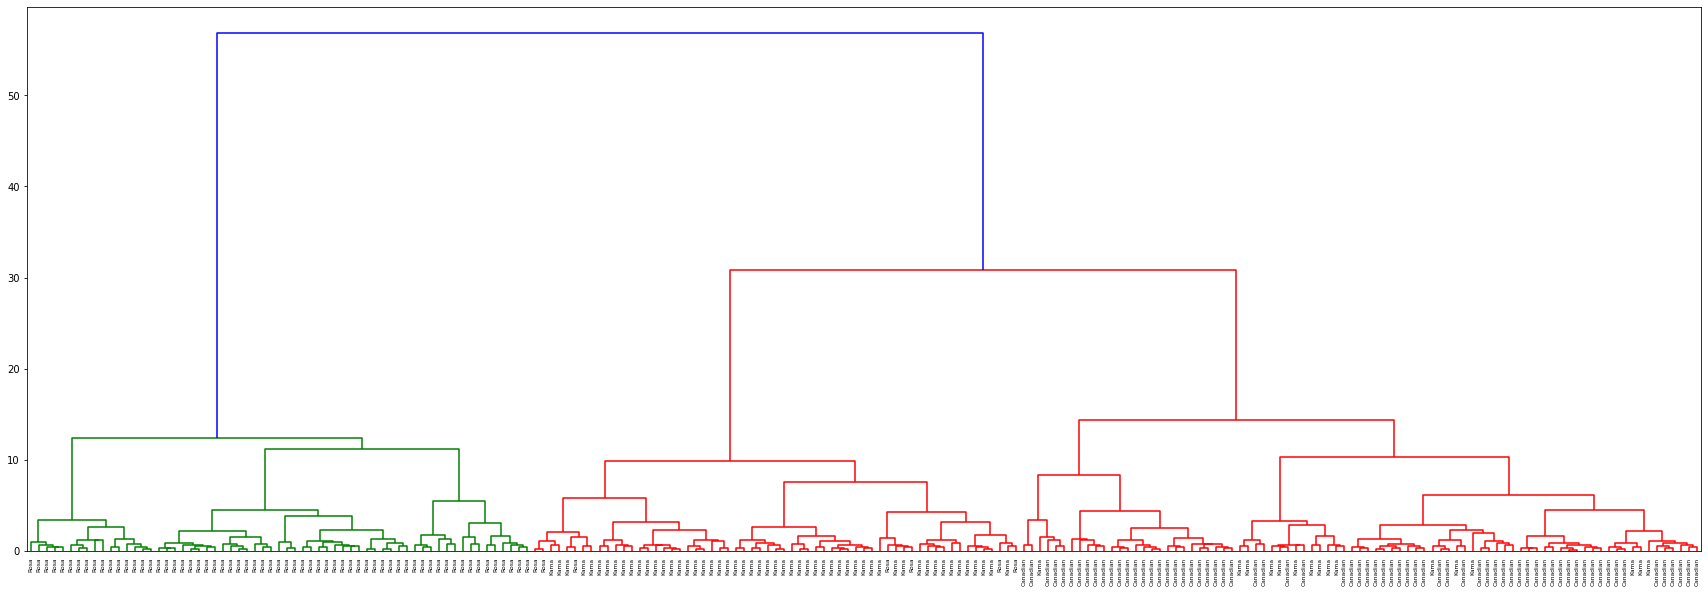

In [30]:
compute_dendrogram('ward')

Analizując powstałe dendrogramy najlepszym okazał się dendrogram wygenerowany przy pomocy metody najdalszych sąsiadów, gdyż tylko ta metoda podzieliła zbiór danych na 3 klastry. W przypadku metody Ward'a i średnich, algorytm zgrupował próbki tylko w 2 klastry, jednakże widoczny jest wyraźny podział na 3 grupy. Sugerując się oryginalnymi klasami próbek i wyraźnie zarysowanymi grupami, można nawet twierdzić, iż metody te zgrupowały dane dokładniej niż metoda najdalszych sąsiadów. Metoda najbliższych sąsiadów okazała się być najgorsza, grupując co prawda dane do 3 klas, jednakże z bardzo niską dokładnością, klasyfikując większość próbek do tej samej grupy.  